# STEP 1: Problem Statement

# Individual Household Electric power consumption

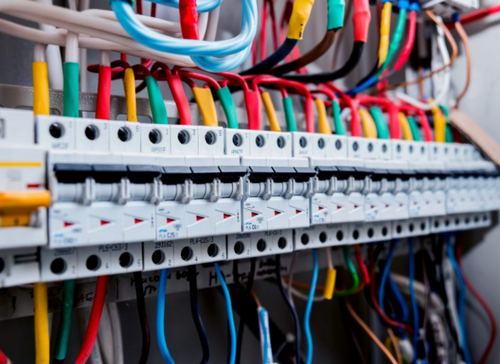
<br>



Individual Household Energy consumption is the actual energy an individual household use for day to day activities that involves electricity. The motive of this project is to forecast the actual electricity usage in a household and to determine the time period the household has heavy consumption. The project uses data from UC Irvne Machine learning Repository, one of the famous repository for machine learning datasets. We will be using the “Individual Household electric power consumption Data Set”. <br>

The Measurement of the electric power consumption in one household with a one-minute sampling rate over a period of almost 4 years. Different electrical quantities and some sub-metering values are available. This data represents a structured multivariate time series of power related variables which has real attribute characteristics. The data is a multivariate series comprised of seven variables, which are: <br>
   Date <br>
   Time <br>
   Global_Active_power <br>
   Global_Reactive_power <br>
   Voltage <br>
   Global_Intensity <br>
   Sub_metering_1 <br>
   Sub_metering_2 <br>
   Sub_metering_3 <br>
The Active energy is the real power consumed by the household, whereas the reactive energy is the unused power in the lines. This is a regression problem that we would be solving, although there are 3 targets in this data, we will only pick the Sub_Metering_1 as our target to determine and forecast the amount of energy used in that category. We will be using the Datetime, Global_Active, Global_Reactive_Power, the Voltage, and Global_Intensity the features that will help us predict the consumption usage. <br>

The project will forecast an interval of future active power consumption, which will be the following: <br>
    (i) Forecast hourly consumption for the next day <br>
    (ii) Forecast daily consumption for the next week <br>
    (iii) Forecast daily consumption for the next month <br>

The dataset does contain some missing values in the measurements (about 1,25% of the rows). While all the datetime are recorded, the measuring equivalent where not recorded. Therefore, the missing values will be represented with the value of the same time from the previous day because we can't delete or ignore these data since there do have datetime records.


#  STEP 2: Data Acquisition



The data was extracted from the UC Irvne Machine learning Repository. The data is downloaded into our local directory and will be extracted from there. Here is the look at the dataset <br>

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
#from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np


%matplotlib inline

In [7]:
data = r'C:\Users\jimofunanya\Desktop\Data Science Class 2\household_power_consump.CSV'
household = pd.read_csv(data, sep=';', parse_dates={'datetime': ['Date', 'Time']}, infer_datetime_format=True, low_memory=False, index_col='datetime')
household.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
2006-12-16 17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2006-12-16 17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
2006-12-16 17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
2006-12-16 17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


 # STEP 3:  Data Dictionary


| ColumnName            | DataType | Description                                                                                                                                                                          |
|-----------------------|----------|--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Global_Active_Power   | Float    | Household global minute-averaged active power(in kilowatt)                                 
| Global_Reactive_Power | Float    | Household global minute-averaged reactive power (in kilowatt)                               
| Voltage               | Float    | Minute average voltage (in volt)                                                           
| Global_Intensity      | Float    | Household global minute-averages current intensity (in ampere)                             
| Sub_Metering_1        | Float    | Energy Sub_metering No. 1(in watt-hour of active energy).<br>It correspond to the Kitchen, containing a dishwater, an oven<br>and a microwave (hot plates are not electric but gas powered)
| Sub_Metering_2        | Float    | Energy sub-metering No. 2( in watt-hour of active energy).<br>It correspond to the laundry room, containing a washing<br>machine, a tumble-drier, a refrigerator and a light.
| Sub_Metering_3        | Float    | Energy sub-metering No 3.(in watt-hour of active energy).<br>It correspond to the electric water-heater and an air conditioner  

# Step 4: Feature Extraction
If you have unstructured data then in this step you need to extract features from the data to generate a dataset

In [3]:
household.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
2006-12-16 17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2006-12-16 17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
2006-12-16 17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
2006-12-16 17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


# Step 5: Data cleaning
Some points to keep in mind:

[ ] Find missing values. <br>
[ ] Find NaN and 0 values. <br>
[ ] Do all columns have the same dtypes? <br>
[ ] Convert dates to datetime types. <br>
[ ] You can use the python package arrow or datetime. <br>
[ ] Convert categorical variables to type 'category' if working with pandas. <br>
[ ] Convert strings to ints or floats if they represent numbers. <br>
[ ] Standardize strings <br>
[ ] Convert them to lower case if possible. <br>
[ ] Replace spaces with underscores or dashes. <br>
[ ] Remove white spaces around the string this is very critical. <br>
[ ] Check of inconsistent spellings typically done manually. <br>
[ ] Look for duplicate rows or columns.<br>
[ ] Look for preprocessed columns; example: A categorical column that has been duplicated with categorical labels <br>

In [8]:
# Check wether any missing value in the datasets
print (household.isnull().values.any())

True


In [9]:
# Total number of missing values
print( household.isnull().sum().sum())

25979


In [10]:
#Replace character values with null 
household.replace('?', np.NaN, inplace=True)

In [11]:
#Get the count of null records on the dataframe
# Total missing values for each feature
household.isnull().sum()

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

In [12]:
#Insert previous value into the rows with Nulls
household.fillna(method='bfill', inplace=True)
household.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
2006-12-16 17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2006-12-16 17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
2006-12-16 17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
2006-12-16 17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [13]:
#Get information about the data
household.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    object 
 1   Global_reactive_power  object 
 2   Voltage                object 
 3   Global_intensity       object 
 4   Sub_metering_1         object 
 5   Sub_metering_2         object 
 6   Sub_metering_3         float64
dtypes: float64(1), object(6)
memory usage: 126.7+ MB


In [14]:
#Convert the Object data types to float for all columns
household = household.astype('float64')

In [15]:
#Checkk to see if we have it converted
household.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Global_intensity       float64
 4   Sub_metering_1         float64
 5   Sub_metering_2         float64
 6   Sub_metering_3         float64
dtypes: float64(7)
memory usage: 126.7 MB


# Step 6: Data preperation
[ ] Convert categorical features to dummy indices if you are doing regression or assign numerical labels if you are doing classification <br>
[ ] Do test train split to generate a test set. Further do a train validation split, you will need to run the test train split function from sklearn twice for this purpose

In [8]:
#Extract the target and Features from the DataFrame
X = household.drop(columns=['Global_active_power', 'Voltage','Global_reactive_power','Global_intensity'])
y = household['Global_active_power']

In [9]:
# perform test train split 
train_x, test_x, train_y, test_y = model_selection.train_test_split(X, y, train_size=0.80, test_size =0.20, random_state =0, shuffle=True)

trainx_shape = train_x.shape
testx_shape = test_x.shape
trainy_shape = train_y.shape
testy_shape =test_y.shape

print("Training data X and y shapes are {} and {}".format(trainx_shape, trainy_shape))
print("Testing data X and y shapes are {} and {}".format(testx_shape, testy_shape))


Training data X and y shapes are (1660207, 3) and (1660207,)
Testing data X and y shapes are (415052, 3) and (415052,)


In [10]:
# Perform Train Validation split
train_x, val_x, train_y, val_y = model_selection.train_test_split(train_x, train_y, train_size=0.60, test_size =0.20, random_state =0, shuffle=True) 
    
xtrain_shape = train_x.shape
xval_shape = val_x.shape
ytrain_shape = train_y.shape
yval_shape = val_y.shape

print("Training data train_x and train_y shapes are {} and {}".format(xtrain_shape, ytrain_shape))
print("Validation data train_x and train_y shapes are {} and {}".format(xval_shape, yval_shape))

Training data train_x and train_y shapes are (996124, 3) and (996124,)
Validation data train_x and train_y shapes are (332042, 3) and (332042,)


# Step 7: Exploratory Data Analysis and Data Visualization¶
There are multiple steps that you need to take here:

[ ] Identify outliers in the datsets. Keep track of them, we want to run to train the model with the outliers and without them to see their effect.<br>
[ ] Check for imbalance in the target variable. Quantify the imbalance.<br>
[ ] Pairplot if possible to check the relationship between all the features and the target.<br>
[ ] Look at the histogram for each variable, try to identify if you have a symmetric or normal distribution.<br>
[ ] If possible plot a QQ plot to check the normality of the data. If you want more information, refer to this.<br>
[ ] If its a classification problem, run a chi-square test between each categorical feature and the target to check for correlation and run ANOVE between the continuous/discrete features and the target to check for correlations.<br>
[ ] If its a regression problem get pearson correlations between the continuous features and target and run ANOVA between each categorical variable and target.<br>
Check for correlations between individual features; use similar approaches as you did with the target.<br>

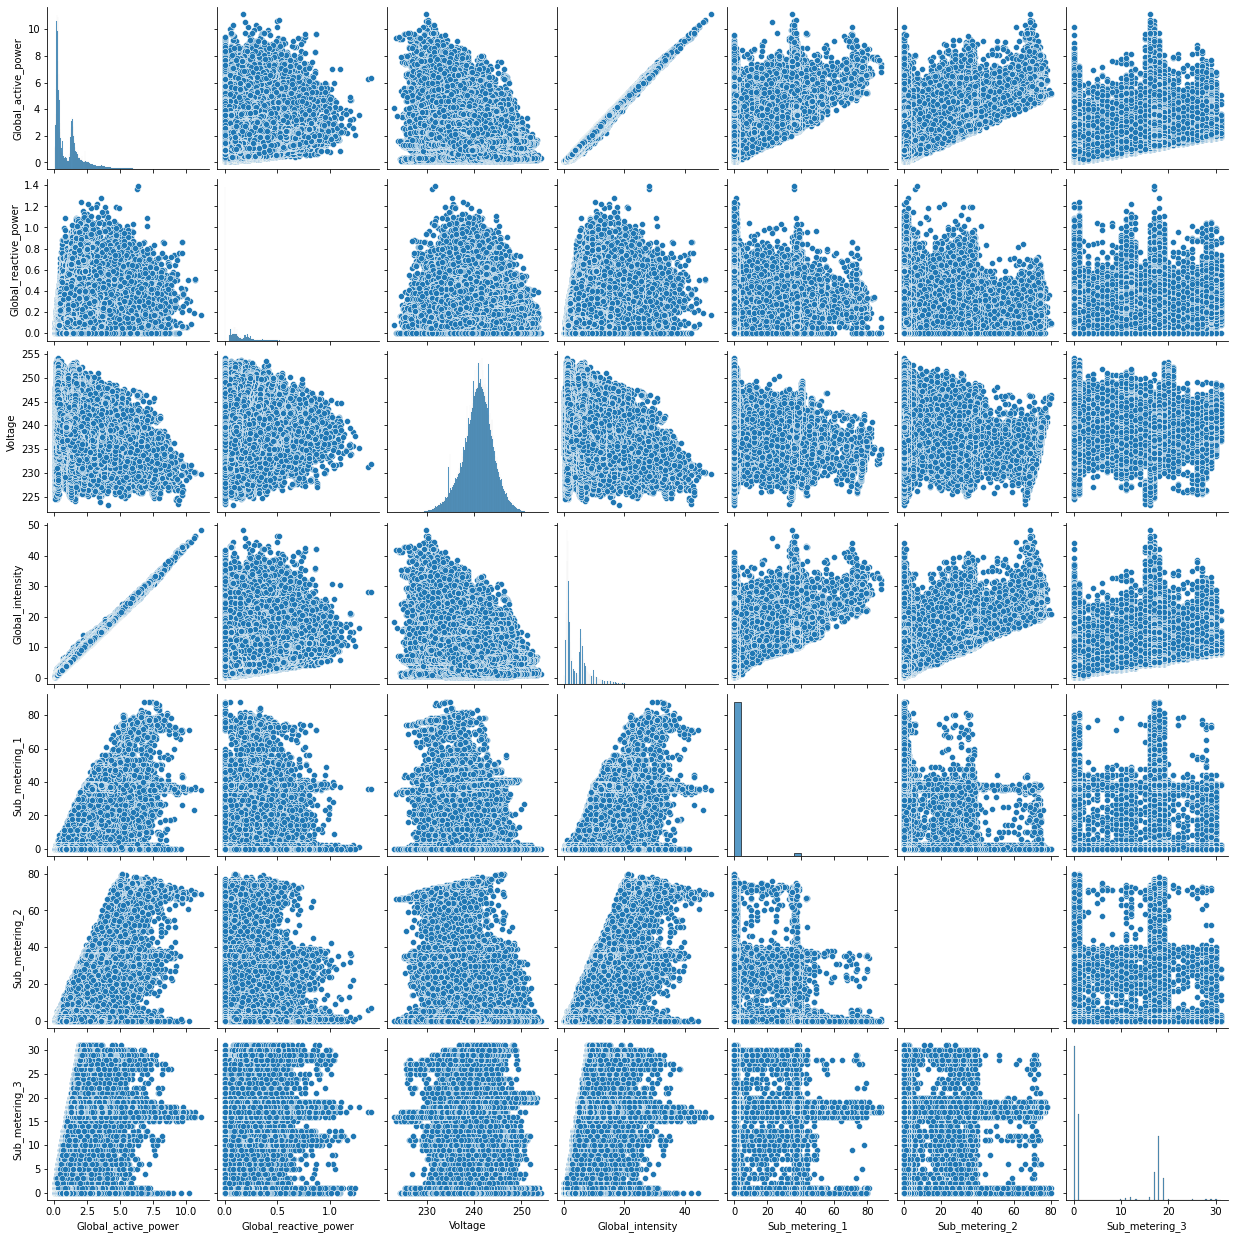

In [12]:
sns.pairplot(household)
plt.show()

<AxesSubplot:>

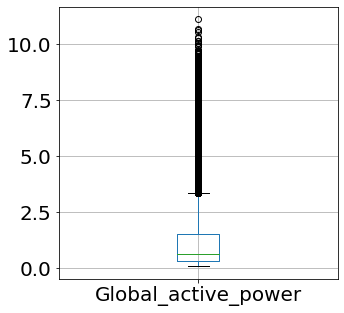

In [13]:
# plotting of Outliers in the Global_active_power Column
household.boxplot("Global_active_power", figsize=(5,5), fontsize= 20)

<AxesSubplot:>

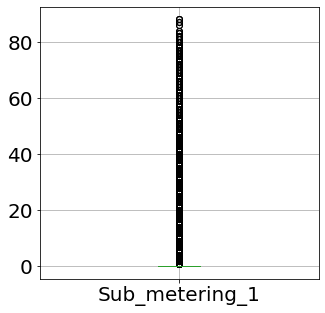

In [14]:
# plotting of Outliers in the Sub_metering_1 Column
household.boxplot("Sub_metering_1", figsize=(5,5), fontsize= 20)

<AxesSubplot:>

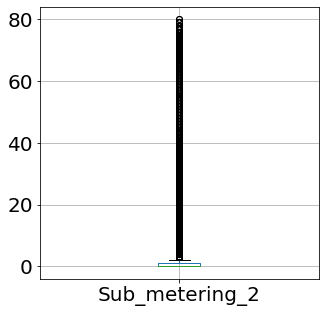

In [15]:
# plotting of Outliers in the Sub_metering_2 Column
household.boxplot("Sub_metering_2", figsize=(5,5), fontsize= 20)

<AxesSubplot:>

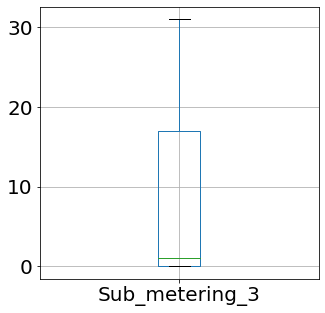

In [16]:
# plotting of Outliers in the Sub_metering_3 Column
household.boxplot("Sub_metering_3", figsize=(5,5), fontsize= 20)

In [17]:
household['Year'] = household.index.year
household['Month'] = household.index.month
household['Quarter'] = household.index.quarter
household['Day'] = household.index.day

# Display a random sampling of 5 rows
household.sample(5, random_state=0)

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Year,Month,Quarter,Day
datetime,,,,,,,,,,,
2008-03-30 21:12:00,3.112,0.000,236.63,13.2,1.0,0.0,17.0,2008,3,1,30
2010-04-29 09:29:00,2.210,0.246,239.55,9.2,0.0,1.0,18.0,2010,4,2,29
2009-07-31 00:05:00,0.666,0.078,242.29,2.8,0.0,0.0,0.0,2009,7,3,31
2010-06-02 09:08:00,1.292,0.058,238.26,5.4,0.0,1.0,18.0,2010,6,2,2
2007-01-25 21:13:00,1.964,0.076,242.06,8.2,0.0,0.0,18.0,2007,1,1,25


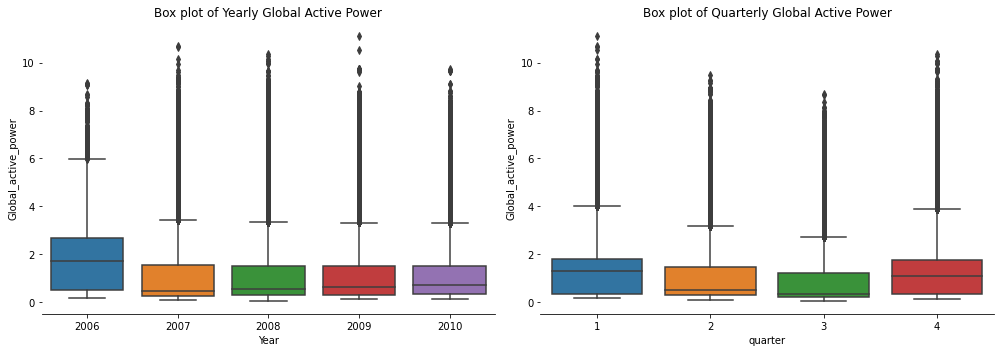

In [22]:
#Box Plot of Yearly vs. Quarterly vs Monthly Global Active Power

#Box Plot of Yearly
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.subplots_adjust(wspace=0.2)
sns.boxplot(x="Year", y="Global_active_power", data=household)
plt.xlabel('Year')
plt.title('Box plot of Yearly Global Active Power')
sns.despine(left=True)
plt.tight_layout()

#Box Plot of Quarterly
plt.subplot(1,2,2)
sns.boxplot(x="Quarter", y="Global_active_power", data=household)
plt.xlabel('quarter')
plt.title('Box plot of Quarterly Global Active Power')
sns.despine(left=True)
plt.tight_layout();


Looking at this graph of each year, we notice that the global active power for year 2006 is much higher than the rest of the years. But we should consider that the year 2006 on have data december only which makes it not accurate that 2006 has the highest global active power usage. <br>
It also shows that December a one of the peak period of higer power usage. the Quarterly graph also indicate that the first quarter and the 4th quarter has the highest number of active power usage. So its safe to say winter periods consume more power than the rest of the season. we also notice that the lowest usage is in the 3rd quarter which is during summer period. <br>
People tend to stay at home more during the winter and outrdoor during summer which flows with the amount of power usage consumed during those periods.<br>
If we look closely at the monthly graph too, we can assumed that what we found out on the other graph are accurate beacuse the month of August has the lowest power usage with July and June also lower to the rest of the month. It picks up again in the month of september till december, january. then start sliding down from febuary.

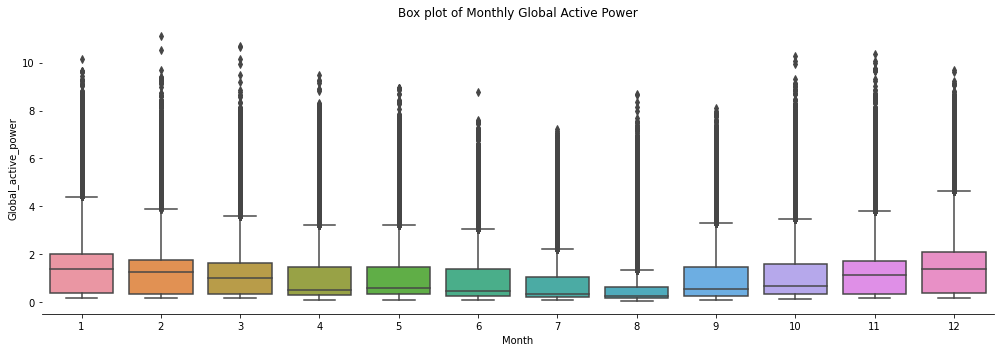

In [18]:

#Box Plot of Monthly
plt.figure(figsize=(14,5))
plt.subplot(1,1,1)
sns.boxplot(x="Month", y="Global_active_power", data=household)
plt.xlabel('Month')
plt.title('Box plot of Monthly Global Active Power')
sns.despine(left=True)
plt.tight_layout();

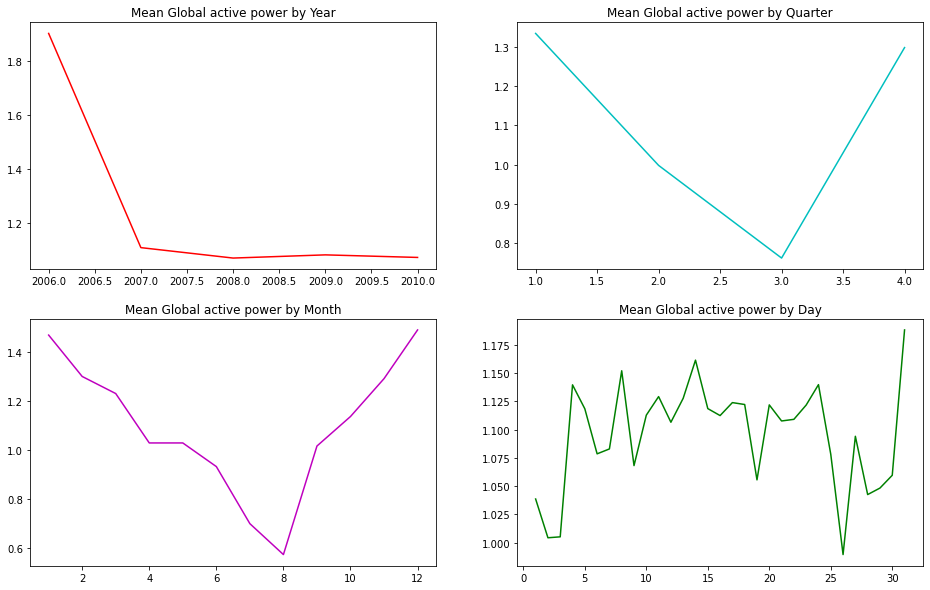

In [19]:
# Plot Mean Global Active Power Grouped by Year, Quarter, Month and Day

plt.figure(figsize=(16,10))
plt.subplot(2,2,1)
household.groupby('Year').Global_active_power.agg('mean').plot(color='r')
plt.xlabel('')
plt.title('Mean Global active power by Year')

plt.subplot(2,2,2)
household.groupby('Quarter').Global_active_power.agg('mean').plot(color='c')
plt.xlabel('')
plt.title('Mean Global active power by Quarter')

plt.subplot(2,2,3)
household.groupby('Month').Global_active_power.agg('mean').plot(color='m')
plt.xlabel('')
plt.title('Mean Global active power by Month')

plt.subplot(2,2,4)
household.groupby('Day').Global_active_power.agg('mean').plot(color='g')
plt.xlabel('')
plt.title('Mean Global active power by Day');

This plot confirmed what we discovered from the previous plots: 
* By year, it was steady. 
* By quarter, the lowest average power consumption was in the 3rd quarter. 
* By month, the lowest average power consumption was in July and August. 
* By day, the lowest average power consumption was around 26th of the month

array([[<AxesSubplot:xlabel='Month'>, <AxesSubplot:xlabel='Month'>,
        <AxesSubplot:xlabel='Month'>, <AxesSubplot:xlabel='Month'>],
       [<AxesSubplot:xlabel='Month'>, <AxesSubplot:xlabel='Month'>,
        <AxesSubplot:xlabel='Month'>, <AxesSubplot:xlabel='Month'>]],
      dtype=object)

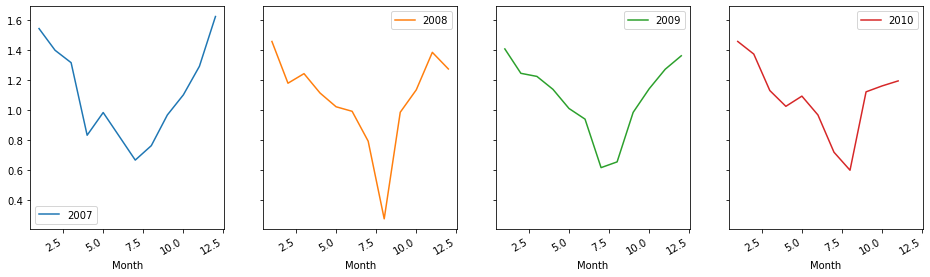

In [20]:
pd.pivot_table(household.loc[household['Year'] != 2006], values = "Global_active_power", 
               columns = "Year", index = "Month").plot(subplots = True, figsize=(16, 10), layout=(2, 4), sharey=True)

We can see from this plot that the pattern are similar accross all year except from 2006 which only has december data only.

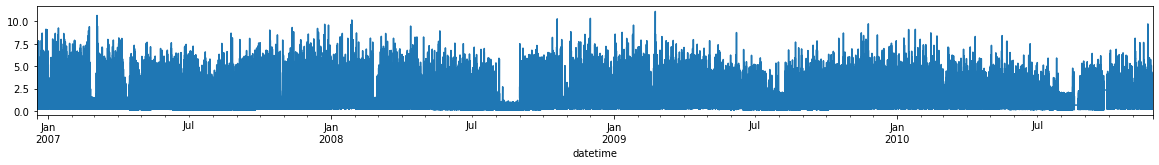

In [23]:
#Generating ta time series for the target (Global_active_power)
household.Global_active_power.plot(figsize=(20,2));


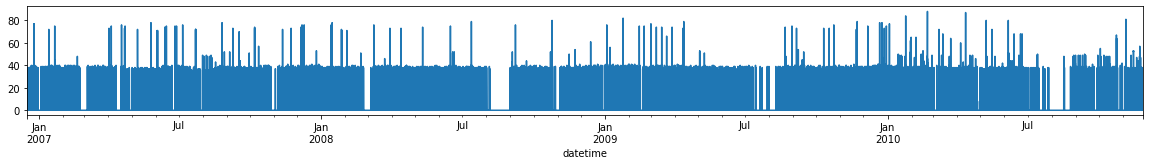

In [24]:
#Generating ta time series for the feature (Sub_metering_1)
household.Sub_metering_1.plot(figsize=(20,2));

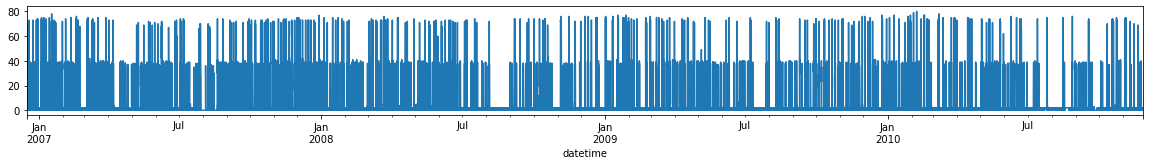

In [25]:
#Generating ta time series for the feature (Sub_metering_2)
household.Sub_metering_2.plot(figsize=(20,2));

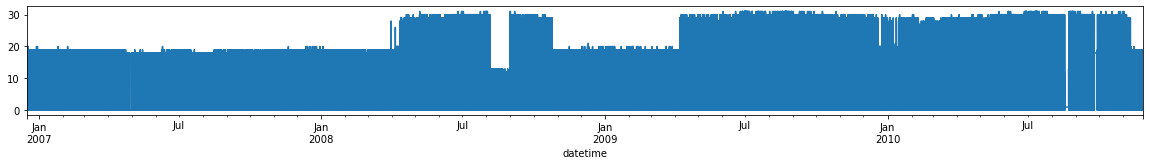

In [26]:
#Generating ta time series for the feature (Sub_metering_3)
household.Sub_metering_3.plot(figsize=(20,2));

array([<AxesSubplot:title={'center':'Global_active_power'}>,
       <AxesSubplot:title={'center':'Sub_metering_1'}>,
       <AxesSubplot:title={'center':'Sub_metering_2'}>,
       <AxesSubplot:title={'center':'Sub_metering_3'}>], dtype=object)

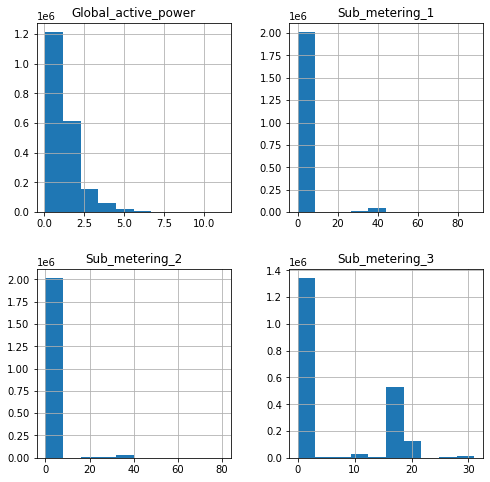

In [27]:
%matplotlib inline

household_data = household[['Global_active_power','Sub_metering_1','Sub_metering_2','Sub_metering_3']]
fig, axis = plt.subplots(2,2,figsize=(8, 8))
household_data.hist(ax=axis)

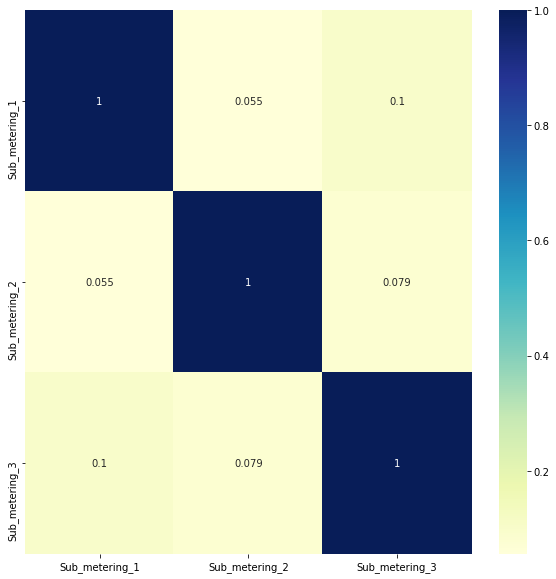

In [41]:
#Check to see if there is correlation between features

corr_matrix = train_x.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix, annot=True, cmap="YlGnBu")
plt.show()

# Step 8: Key Insights from EDA
In this section you will present what you have learnt from performing Exploratory Data Analysis. At the end of this section you should have written down the following:

 * A bullet point list of relationship between features and target and between individual features.<br>
 * A written summary of what the conclusions of the exploratory data analysis.<br>
The first point involves writing down what type of correlations observed between each feature and target. For regression you can state the correlation value ( r-squared value) between the feature and the target for classification you can state the p-value of the chi-square test with the conclusion of weather you are accepting or reject the null hypothsis. The same should be done for between individual features.<br>

The second part involves writing a small summary of part 1. You should mention in words the conclusion that you reached.<br>

There may be situations where you maybe compelled to drop a varible because you have either too many outliers or it has strong correlations with the output. You may even want to create new variables using external data that you have imported. You should document and discuess these changes in this section.

In [30]:
lr = LinearRegression()
lr.fit(train_x, train_y)
preds = lr.predict(test_x)
rmse = np.sqrt(mean_squared_error(preds, test_y))
print("Root mean squared error is {:.4f}".format(rmse))


Root mean squared error is 0.5587
